<ipython-input-1-89437cea51db>:53: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', s=100, edgecolors='k')


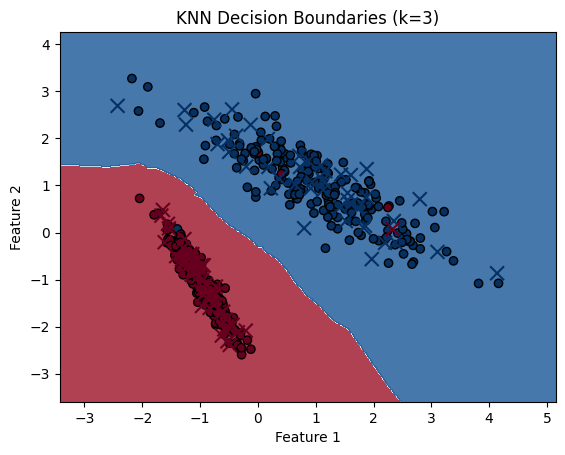

Train Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       198
           1       0.99      0.99      0.99       202

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Test Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.98      1.00      0.99        47

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [1]:
# Import necessary libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc, classification_report

# AUA id - A09190016
# Step 1: Generate a Simulated Dataset
# Generate a synthetic dataset with specific characteristics:
# - 500 samples
# - 2 informative features
# - 2 classes
# - 0 redundant features
# - 1 cluster per class
# Set the random state to 16 for reproducibility
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=16)

# Step 2: Split the Data into Training and Test Sets
# Split the dataset into training (80%) and test (20%) sets using a random state of 16.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

# Step 3: Hyperparameter Tuning for KNN
# Define a hyperparameter grid for the number of neighbors (k).
param_grid = {'n_neighbors': [1, 3, 5, 7, 9]}

# Create a K-Nearest Neighbors classifier.
knn = KNeighborsClassifier()

# Perform hyperparameter tuning using 5-fold cross-validation.
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best number of neighbors (k) from the hyperparameter tuning results.
best_k = grid_search.best_params_['n_neighbors']

# Step 4: Visualize Decision Boundaries
# Define parameters for plotting the decision boundaries.
h = 0.02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class labels for each point on the mesh grid.
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a plot to visualize the decision boundaries.
plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, marker='o', edgecolors='k')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.RdBu, marker='x', s=100, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'KNN Decision Boundaries (k={best_k})')
plt.show()

# Step 5: Model Evaluation
# Create the final K-Nearest Neighbors model with the best k.
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)

# Make predictions on the training and test sets.
y_train_pred = knn_final.predict(X_train)
y_test_pred = knn_final.predict(X_test)

# Calculate ROC and PR curves and areas under the curves.
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)
precision, recall, _ = precision_recall_curve(y_test, y_test_pred)
pr_auc = auc(recall, precision)

# Print classification reports for both training and test sets.
print("Train Classification Report:\n", classification_report(y_train, y_train_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

# The model appears to work exceptionally well with no signs of overfitting or underfitting.
# It performs similarly well on both training and test data.
# Both classes (0 and 1) are predicted with high precision, recall, and F1-scores, indicating balanced performance.
